In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
import random as rd

#Hierarchical clustering
import scipy
# from scipy.cluster import hierarchy
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.spatial.distance import pdist
# from scipy.spatial.distance import squareform
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
import networkx as nx

In [171]:
#where w=last 3 digits of your M#; x1=w module 5, y1=w modulo 12, x2=w modulo 10; y2=w modulo 15.
#M = 15229756
w = 756
x1 = np.mod(w,5)
y1 = np.mod(w,12)

print((x1,y1))

x2 = np.mod(w,10)
y2 = np.mod(w,15)
print((x2,y2))

(1, 0)
(6, 6)


In [172]:
P1 = [1, 5]
P2 = [4, 7]
P3 = [6, 9]
P4 = [4, 1]
P5 = [6, 5]
P6 = [10, 9]
P7 = [2, 2]
P8 = [12, 8]
P9 = [x1, y1]
P10 = [x2, y2]

data = np.array([P1, P2, P3, P4, P5, P6, P7, P8, P9, P10], dtype = object)

df = pd.DataFrame(data, index = ['P%d' %(i+1) for i in range(0,10)], columns = ['X','Y'] )
df

,X,Y
P1,1,5
P2,4,7
P3,6,9
P4,4,1
P5,6,5
P6,10,9
P7,2,2
P8,12,8
P9,1,0
P10,6,6


###### 1. (5) Plot the ten points of the dataset on a 2-d plane and points out the locations of points P9 and P10 with different color, symbol, or marker

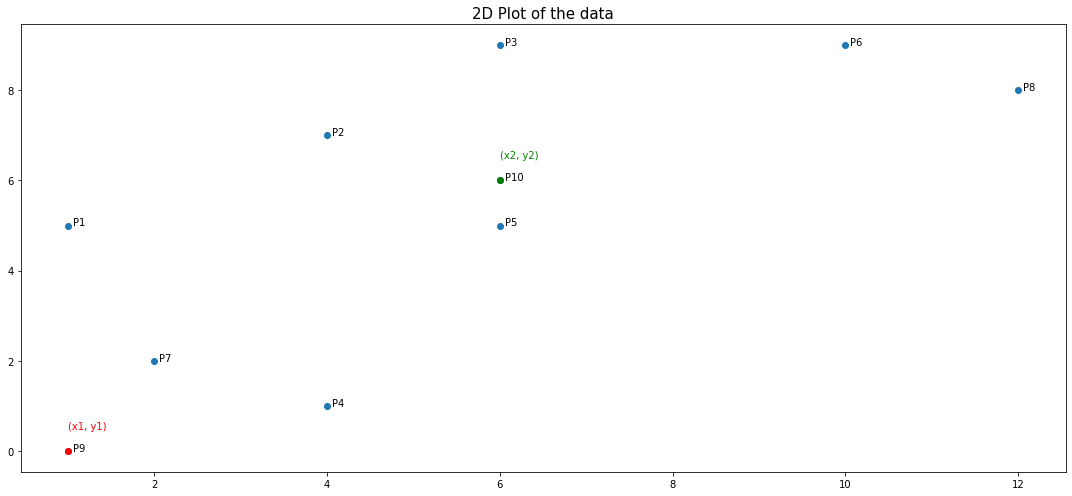

In [265]:
ig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('2D Plot of the data', size=15)
ax.scatter('X', 'Y', data=df);
plt.scatter(x1, y1, c='red') 
plt.scatter(x2, y2, c='green') #plot the special point
plt.text(x1,y1+0.5, "(x1, y1)",  color = 'red')
plt.text(x2,y2+0.5, "(x2, y2)", color = 'green')#just for annotation

for i in range(len(data)):
    ax.annotate('P%d' %(i+1), xy=(data[i][0], data[i][1]), xytext=(5,0), textcoords='offset points')
    
plt.show()

###### 2. (18) Consider using the hierarchical clustering algorithm with complete linkage. DO NOT calculate all pairwise distances to do the following. Use a copy of the plot generated in Q#1 above and based on your visual estimates of the Euclidean distances among points, show the first five mergers of subclusters/points in the format: Point/Subcluster-a merged with Point/Subcluster-b having a distance of nn.mm, to form subcluster-c. Also, indicate the mergers by drawing appropriate boundaries around the points/subclusters in the visual plot of the points.

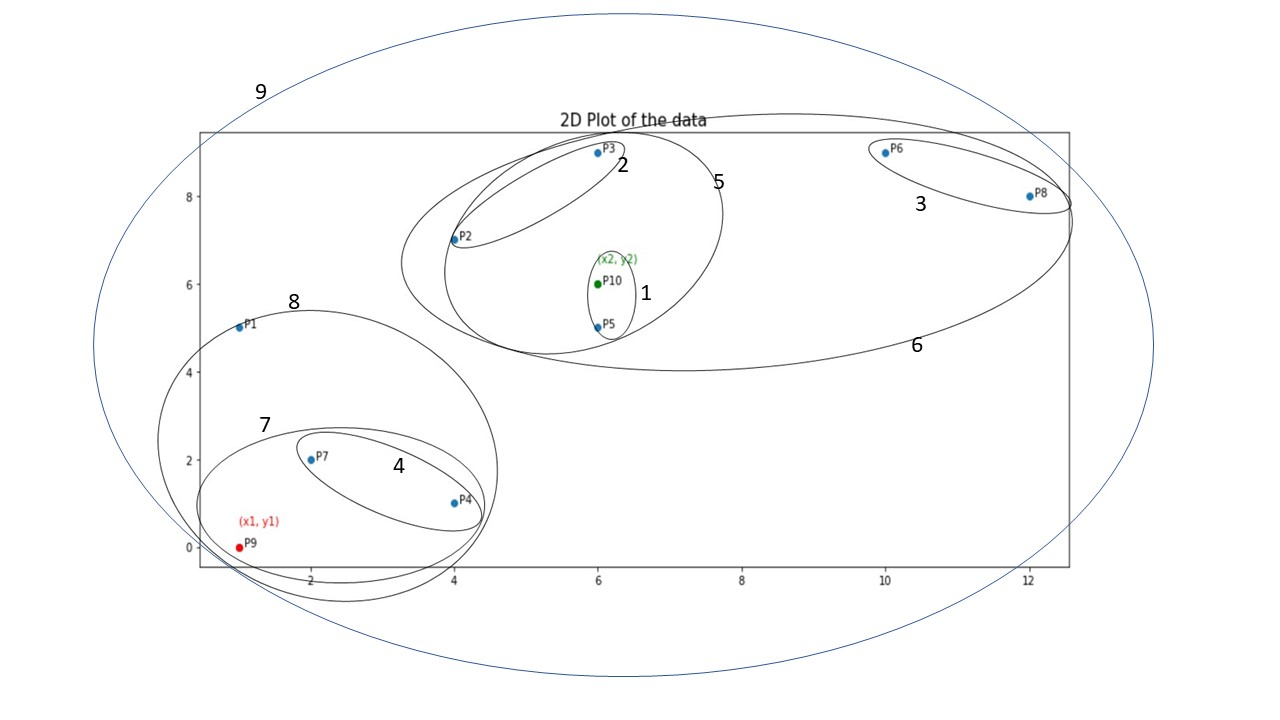

+ Point P5 merged with Point P10 having a distance of 1 to form subcluster A
+ Point P4 merged with Point P7 having a distance of 2.23 to form subcluster B
+ Point P6 merged with Point P8 having a distance of 2.23 to form subcluster C
+ Point P2 merged with Point P3 having a distance of 2.82 to form subcluster D
+ Point P9 merged with subcluster B having a distance of 3.16 to form subcluster E


##### 3. (8) Under what conditions you would prefer to use hierarchical clustering over k-means clustering algorithm? Give a brief answer.


+ Hirarchical clustering will help us give as many clusters as possible in varying level of granularity without having the need to re run the algorithm unlike K means

+ Hierarchical cluster can give more similar clusters than K means with the help of dendogram
+ With k-Means clustering, you need to have a sense ahead-of-time what your desired number of clusters is. Also, k-means will often give unintuitive results if data is not well-separated into sphere-like clusters
+ In contrast, hierarchical clustering has fewer assumptions about the distribution of your data - the only requirement (which k-means also shares) is that a distance can be calculated each pair of data points. 
+ Hierarchical produces more intuitive clusters

##### 4. (18) Assume P2 and P9 to be the initial cluster centers for an execution of the Fuzzy C means algorithms with this dataset. Compute the membership values of the data points P1, P8, and P10 for each of the two clusters. Show your work for these computations.


In [268]:
print('P2:',P2)
print('P9:',P9)

P2: [4, 7]
P9: [1, 0]


In [273]:
data_points= df[(df.index=="P1" )| (df.index=="P8") |( df.index=="P10") ]
centers= df[(df.index=="P2")| (df.index=="P9")]
#centers.index
p=2
wp= 1/(p-1)
fuzzy_c= pd.DataFrame()

for c in centers.index:
    
    value=[]
    for i in data_points.index:
        dist=euclidean(data_points[(data_points.index==i)],centers[(centers.index==c)] )**2
        a= np.power(1/dist, wp)
        value.append(a)
    fuzzy_c[c]=(value)
    
fuzzy_c.index=data_points.index
fuzzy_c["deno"]=fuzzy_c[["P2", "P9"]].sum(axis=1)


for c in centers.index:
    arr=[]
    d= sum(fuzzy_c[c])
    for i in fuzzy_c.index :
        
        val=fuzzy_c[c].loc[i]/fuzzy_c["deno"].loc[i]
        arr.append(val)
    fuzzy_c[c+"_membership"]=(arr)    

print(fuzzy_c[["P2_membership", "P9_membership"]])

     P2_membership  P9_membership
P1        0.657895       0.342105
P8        0.740000       0.260000
P10       0.924242       0.075758


##### 5. (8) Briefly describe situations under which you will prefer Fuzzy C-means algorithm over the Gaussian Mixture Model algorithm (based on the EM algorithm).

+ Fuzzy C-Means algorithm works well for clusters that do not necessarily take the form of a distribution. It is non-parametric clustering technique- In the cases where the data is overlapping and doesn't confine to a distribution, Fuzzy C-Means works well as it calculates the membership percentages and lets a data point to be in more than one cluster.

+ Fuzzy C-means model their clusters as circles (spheres in n-dimensional space).

+ However, EM clustering models the clusters as probability density functions. In Euclidean space, this can have elliptical shapes that are determined by covariance matrices. Hence we cannot have data points overlapping in multiple clusters.

+ Thus, we could use Fuzzy C means when we have overlapping data, EM when we desire elliptical clusters. 
    + We can use Fuzzy C means without calculating parameteres such as mean and standard deviation, ie when we cannot confidently make assumptions of randomly distributed data. Example - Image classification.

##### 6. (21) Perform the following steps towards spectral clustering of these datapoints.


###### a. (3) Find the three nearest neighbors (Euclidean distance) of each data point and draw a graph by including edges only to the 3 nearest neighbors for each data  point.

In [188]:
dist_matrix = pd.DataFrame(euclidean_distances(df),
                           index = ['P%d' %(i+1) for i in range(0,10)], columns = ['P%d' %(i+1) for i in range(0,10)]
                          )
dist_matrix

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0.000000,3.605551,6.403124,5.000000,5.000000,9.848858,3.162278,11.401754,5.000000,5.099020
P2,3.605551,0.000000,2.828427,6.000000,2.828427,6.324555,5.385165,8.062258,7.615773,2.236068
P3,6.403124,2.828427,0.000000,8.246211,4.000000,4.000000,8.062258,6.082763,10.295630,3.000000
P4,5.000000,6.000000,8.246211,0.000000,4.472136,10.000000,2.236068,10.630146,3.162278,5.385165
P5,5.000000,2.828427,4.000000,4.472136,0.000000,5.656854,5.000000,6.708204,7.071068,1.000000
P6,9.848858,6.324555,4.000000,10.000000,5.656854,0.000000,10.630146,2.236068,12.727922,5.000000
P7,3.162278,5.385165,8.062258,2.236068,5.000000,10.630146,0.000000,11.661904,2.236068,5.656854
P8,11.401754,8.062258,6.082763,10.630146,6.708204,2.236068,11.661904,0.000000,13.601471,6.324555
P9,5.000000,7.615773,10.295630,3.162278,7.071068,12.727922,2.236068,13.601471,0.000000,7.810250
P10,5.099020,2.236068,3.000000,5.385165,1.000000,5.000000,5.656854,6.324555,7.810250,0.000000


In [199]:
d = dist_matrix.values.argsort(1)[:,:4]
d = d+1
d = np.delete(d, 0, axis=1)
d = pd.DataFrame(d, index = df.index , columns = ["point 1", "point 2", "point 3"]) 
d["point 1"] = d["point 1"].astype('string')
d["point 2"] =  d["point 2"].astype('string')
d["point 3"] =  d["point 3"].astype('string')
d["point 1"] = 'P' + d["point 1"]
d["point 2"] = 'P' + d["point 2"]
d["point 3"] = 'P' + d["point 3"]
print(" 3 Nearest Neighbors:")
d

 3 Nearest Neighbors:


,point 1,point 2,point 3
P1,P7,P2,P4
P2,P10,P3,P5
P3,P2,P10,P5
P4,P7,P9,P5
P5,P10,P2,P3
P6,P8,P3,P10
P7,P4,P9,P1
P8,P6,P3,P10
P9,P7,P4,P1
P10,P5,P2,P3


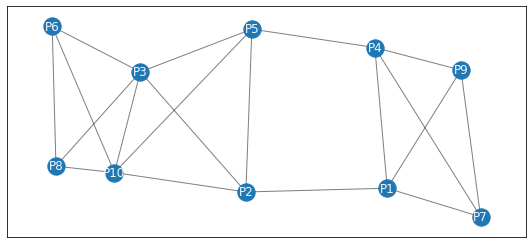

In [187]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

G = nx.Graph()
def draw_graph(G):
    pos = nx.spring_layout(G, seed=99999999)
    nx.draw_networkx_nodes(G, pos, node_color="tab:blue")
    nx.draw_networkx_labels(G, pos, font_color="whitesmoke")
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

#G.add_edge("a", "b", weight=0.6)

for i in d.index:
    for j in d.columns: 
        
        k = d.loc[i][j]
        #print(i,k)
        G.add_edge(i, k , weight= dist_matrix.loc[i][k])

draw_graph(G)


###### 6.b. (3) Show the adjacency matrix of this graph.
Adjacency matrix W has weights 𝑊𝑖𝑗 and 𝑊𝑖𝑗 ≥ 0 weight of edge (𝑖,𝑗), 𝑖 ≠ 𝑗

In [210]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
AM = dist_matrix

for col in AM.columns:
    AM[col].values[:] = 0

#G.add_edge("a", "b", weight=0.6)

for i in d.index:
    for j in d.columns: 
        
        k = d.loc[i][j]
        #print(i,k)
        AM.loc[i][k] = AM.loc[k][i] = 1
        
print("Adjacency Matrix:")
AM = AM.astype(int)
AM

Adjacency Matrix:


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0,1,0,1,0,0,1,0,1,0
P2,1,0,1,0,1,0,0,0,0,1
P3,0,1,0,0,1,1,0,1,0,1
P4,1,0,0,0,1,0,1,0,1,0
P5,0,1,1,1,0,0,0,0,0,1
P6,0,0,1,0,0,0,0,1,0,1
P7,1,0,0,1,0,0,0,0,1,0
P8,0,0,1,0,0,1,0,0,0,1
P9,1,0,0,1,0,0,1,0,0,0
P10,0,1,1,0,1,1,0,1,0,0


###### 6.c. (3) Show the Laplacian (as discussed in class) of this graph

In [211]:
degree_matrix = pd.DataFrame(np.diag(np.sum(np.array(AM), axis=1)))
degree_matrix = degree_matrix.astype(int)
print('Degree matrix:')
degree_matrix

degree matrix:


,0,1,2,3,4,5,6,7,8,9
0,4,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,0,0,0
2,0,0,5,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,0,0
4,0,0,0,0,4,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0
6,0,0,0,0,0,0,3,0,0,0
7,0,0,0,0,0,0,0,3,0,0
8,0,0,0,0,0,0,0,0,3,0
9,0,0,0,0,0,0,0,0,0,5


In [216]:
Laplacian = np.array(degree_matrix) - np.array(AM)
print("Laplacian Matrix:")
Laplacian

Laplacian Matrix:


array([[ 4, -1,  0, -1,  0,  0, -1,  0, -1,  0],
       [-1,  4, -1,  0, -1,  0,  0,  0,  0, -1],
       [ 0, -1,  5,  0, -1, -1,  0, -1,  0, -1],
       [-1,  0,  0,  4, -1,  0, -1,  0, -1,  0],
       [ 0, -1, -1, -1,  4,  0,  0,  0,  0, -1],
       [ 0,  0, -1,  0,  0,  3,  0, -1,  0, -1],
       [-1,  0,  0, -1,  0,  0,  3,  0, -1,  0],
       [ 0,  0, -1,  0,  0, -1,  0,  3,  0, -1],
       [-1,  0,  0, -1,  0,  0, -1,  0,  3,  0],
       [ 0, -1, -1,  0, -1, -1,  0, -1,  0,  5]])

###### 6.d(3) Find and show all the Eigen values and their corresponding Eigen vectors. Show which Eigen value corresponds to which Eigen vector.


In [218]:
cov_matrix = np.cov(Laplacian)
print('The Covariance Matrix:\n', cov_matrix)

The Covariance Matrix:
 [[ 2.22222222 -0.88888889  0.11111111 -0.66666667  0.22222222  0.
  -0.55555556  0.         -0.55555556  0.11111111]
 [-0.88888889  2.22222222 -0.77777778  0.22222222 -0.66666667  0.22222222
   0.11111111  0.22222222  0.11111111 -0.77777778]
 [ 0.11111111 -0.77777778  3.33333333  0.11111111 -0.77777778 -0.66666667
   0.         -0.66666667  0.         -0.66666667]
 [-0.66666667  0.22222222  0.11111111  2.22222222 -0.88888889  0.
  -0.55555556  0.         -0.55555556  0.11111111]
 [ 0.22222222 -0.66666667 -0.77777778 -0.88888889  2.22222222  0.22222222
   0.11111111  0.22222222  0.11111111 -0.77777778]
 [ 0.          0.22222222 -0.66666667  0.          0.22222222  1.33333333
   0.         -0.44444444  0.         -0.66666667]
 [-0.55555556  0.11111111  0.         -0.55555556  0.11111111  0.
   1.33333333  0.         -0.44444444  0.        ]
 [ 0.          0.22222222 -0.66666667  0.          0.22222222 -0.44444444
   0.          1.33333333  0.         -0.66666667]


In [263]:
from numpy.linalg import eigh
eigen_values, eigen_vectors =eigh(Laplacian)

EVal = np.round(pd.DataFrame(eigen_values),3)
EVec = np.round(pd.DataFrame(eigen_vectors),3)

for i in range(0,10):
    
    print("Eigen value", i+1 ,"=", EVal.loc[i,0])
    print("Eigen Vector:" , i+1, "=\n", EVec.loc[:,i], "\n")  


Eigen value 1 = 0.0
Eigen Vector: 1 =
 0   -0.316
1   -0.316
2   -0.316
3   -0.316
4   -0.316
5   -0.316
6   -0.316
7   -0.316
8   -0.316
9   -0.316
Name: 0, dtype: float64 

Eigen value 2 = 0.548
Eigen Vector: 2 =
 0    0.310
1   -0.094
2   -0.271
3    0.310
4   -0.094
5   -0.373
6    0.427
7   -0.373
8    0.427
9   -0.271
Name: 1, dtype: float64 

Eigen value 3 = 2.481
Eigen Vector: 3 =
 0    0.057
1    0.501
2    0.102
3    0.057
4    0.501
5   -0.424
6   -0.236
7   -0.424
8   -0.236
9    0.102
Name: 2, dtype: float64 

Eigen value 4 = 4.0
Eigen Vector: 4 =
 0    0.096
1    0.096
2   -0.000
3   -0.096
4   -0.096
5   -0.364
6   -0.591
7    0.364
8    0.591
9    0.000
Name: 3, dtype: float64 

Eigen value 5 = 4.0
Eigen Vector: 5 =
 0    0.453
1    0.453
2    0.000
3   -0.453
4   -0.453
5   -0.164
6    0.249
7    0.164
8   -0.249
9   -0.000
Name: 4, dtype: float64 

Eigen value 6 = 4.0
Eigen Vector: 6 =
 0    0.188
1    0.188
2    0.000
3   -0.188
4   -0.188
5    0.583
6   -0.298
7   -

##### 6E. Show the smallest Eigen value that is larger than 0 and show in it the value associated for each node of the graph.

In [254]:
print("Smallest Eigen value that is larger than 0:", EVal[0][1])
print('Eigen value associated for each node of the graph ', 2, 'is: \n', eigen_vectors[:, 1])

Smallest Eigen value that is larger than 0: 0.548
Eigen value associated for each node of the graph  2 is: 
 [ 0.31022738 -0.09421238 -0.27060397  0.31022738 -0.09421238 -0.37280958
  0.42739854 -0.37280958  0.42739854 -0.27060397]


###### 6F. Cluster the graph into two parts using the eigen value used in (e) above. Show two parts of the graph on the 2-d plot as produced by this step.

Based on the eigen vector values = 2,3,5,6,8,10 points will be in one cluster an 1,4,9,7 will be in one cluster




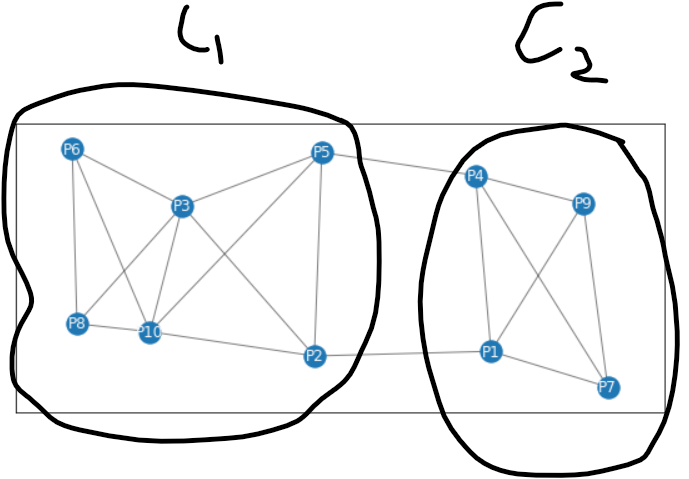

##### 6G. Would k-means algorithm with this data produced these same two clusters? Give your reasons for your Yes (or No) answer to the question.

+ No, K means would not have produced same two clusters.
+ K-means has difficulty detecting the intuitive clusters, when tehy have non-spherical shapes or varying sizes or densities.
+ K-means would have found two clusters like this in circular shape, which is not in true essence of the clusters:

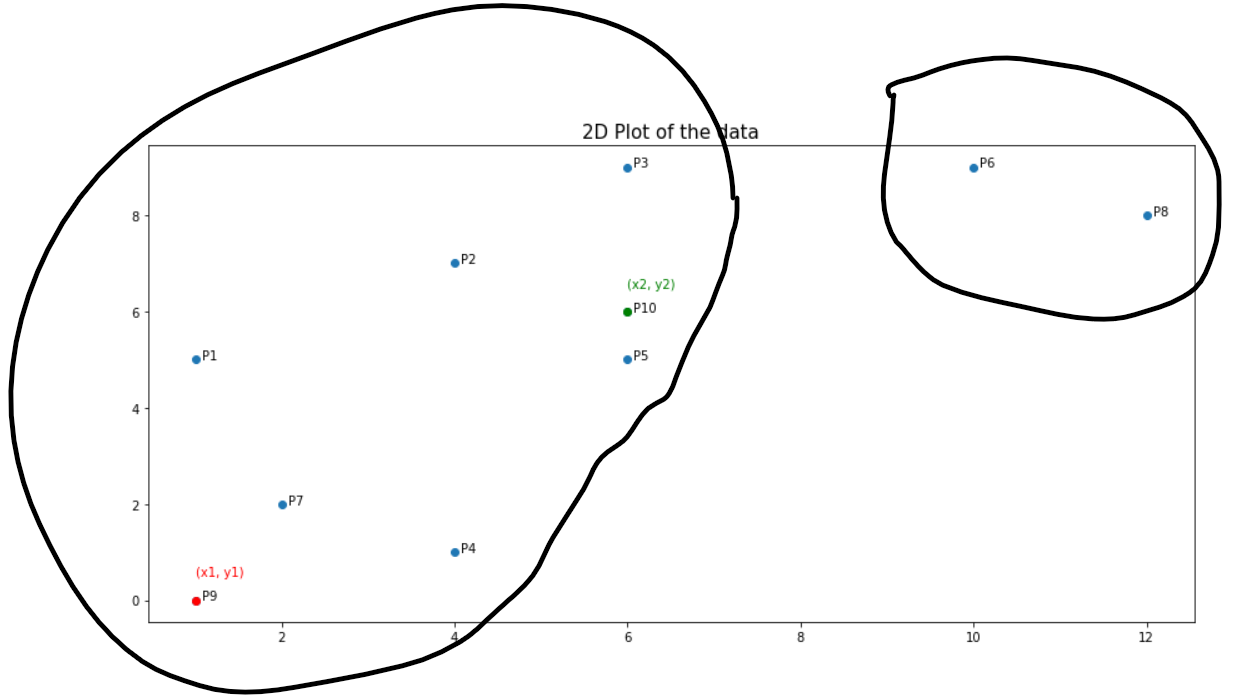

##### 7. Is Silhouette coefficient a good metric to assess the performance of the Spectral clustering algorithm? Justify your answer with examples of data points and clusters to show why or why not this may be a good metric.

Silhouette Coefficient is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

Silhouette Score = (b-a)/max(a,b)

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

We can clearly see below that spectral clustering did a good job on differentiating the data into 3 clusters. If we compute the Silhouette Coefficient on such data, when computing the numerator (b-a) a could be much larger compared to b making the coefficient to be a -ve value. This will result in a wrong clustering.

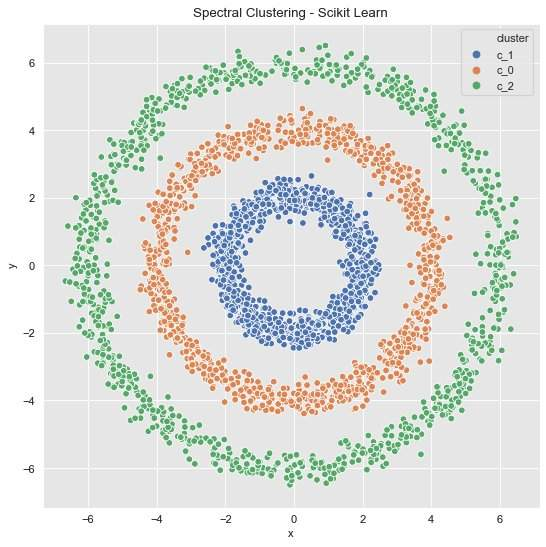

##### 8. Show the case of a dataset, by selecting appropriate data points and plotting them on a 2-D plane, for which the Spectral clustering and bisecting K-means will give very different results. Show the two different results you expect to obtain and explain why the results will be different. You do not need to actually run the algorithms on your selected data. Give answers based on your intuition.

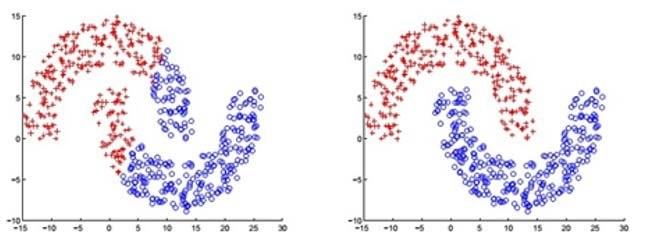

Consider the data shown above. If we have to create 2 clusters, The spectral clustering will produce results as shown on the right side, according to the intuition. 
However, bisecting K means would give results as shown on the right side of the image on my data. This is because just like Kmeans, Bisecting Kmeans initially splits the clusters into 2 clusters in globular shapes.
Spectral clustering technique provides different clusters in non globular shapes.